In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class GaussianNaiveBayes:

    def __init__(self):
        self.mean = {}
        self.var = {}
        self.prior = {}
        self.posterior = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples = X.shape[0]

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] =  X_c.var(axis=0)
            # frequency of each class
            self.prior[c] = len(X_c) / n_samples

    def calculate_likelihood(self, x, mean, var):
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return np.sum(np.log((exponent / np.sqrt(2 * np.pi * var))))

    def predict(self, X):
        predictions = []
        for x in X:
            for c in self.classes:
                likelihood = self.calculate_likelihood(x, self.mean[c], self.var[c])
                self.posterior[c] = likelihood * self.prior[c]
            predictions.append(max(self.posterior, key=self.posterior.get))
        return predictions

In [3]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

In [5]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:0.1f}%")

Accuracy: 100.0%


In [6]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred,labels=list(np.arange(0,3)))

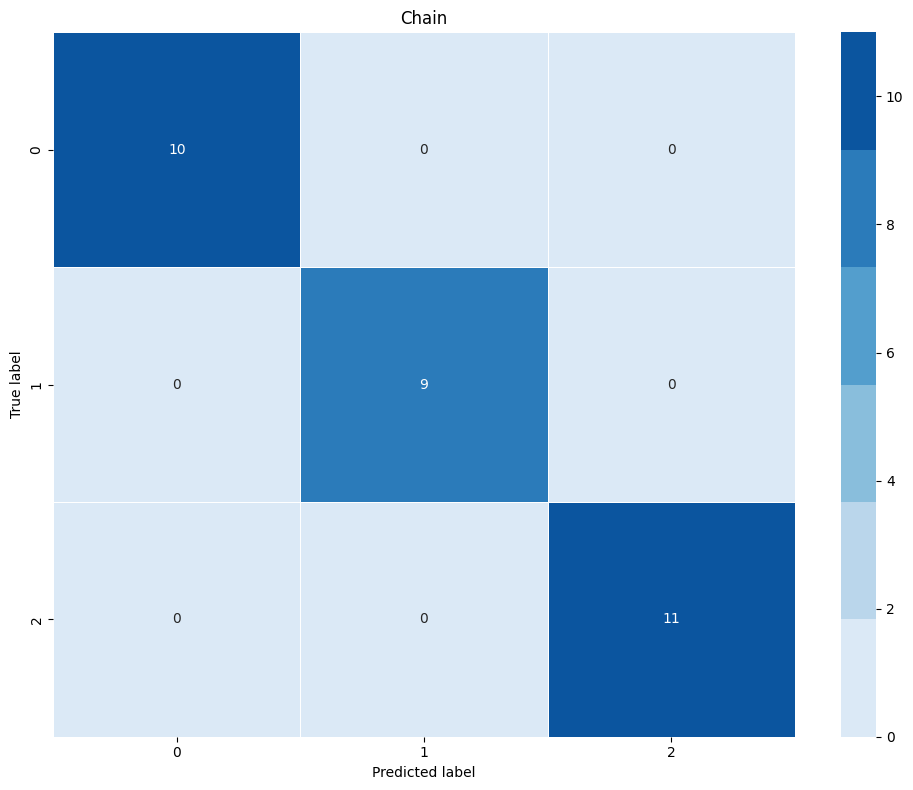

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(cm, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Blues"))
ax.set(title='Chain', xlabel='Predicted label', ylabel='True label')
plt.tight_layout()
plt.show()